In [23]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [24]:
# Function for running the C++ code for different number of points
def run_cpp_code(num_threads, num_points):
    command = f'"C:\\Users\\νο ναμε\\OpenMp\\monte_carlo_pi_2.exe" {num_threads} {num_points}'
    
    # Running the command and capturing output
    output = subprocess.check_output(command, shell=True, universal_newlines=True)
    
    pi_estimate = float(output.strip())
    return pi_estimate

In [25]:
# True value of Pi 
true_pi = np.pi

In [26]:
# Number of points to use for each run (from 10^2 to 10^11)
points_list = [10**i for i in range(2, 12)]
errors = []

In [27]:
# Running the C++ code for each number of points and calculating the error
for num_points in points_list:
    pi_estimate = run_cpp_code(num_threads=12, num_points=num_points)
    error = abs(pi_estimate - true_pi)
    errors.append(error)
    print(f"Points: {num_points}, Pi Estimate: {pi_estimate}, Error: {error}")

Points: 100, Pi Estimate: 3.12, Error: 0.02159265358979301
Points: 1000, Pi Estimate: 3.168, Error: 0.026407346410207033
Points: 10000, Pi Estimate: 3.146, Error: 0.004407346410206792
Points: 100000, Pi Estimate: 3.13892, Error: 0.0026726535897929615
Points: 1000000, Pi Estimate: 3.14217, Error: 0.0005773464102070136
Points: 10000000, Pi Estimate: 3.1415, Error: 9.265358979293481e-05
Points: 100000000, Pi Estimate: 3.14167, Error: 7.734641020684663e-05
Points: 1000000000, Pi Estimate: 3.14153, Error: 6.265358979318236e-05
Points: 10000000000, Pi Estimate: 3.14159, Error: 2.6535897932333796e-06
Points: 100000000000, Pi Estimate: 3.14159, Error: 2.6535897932333796e-06


In [28]:
points_array = np.array(points_list)
errors_array = np.array(errors)

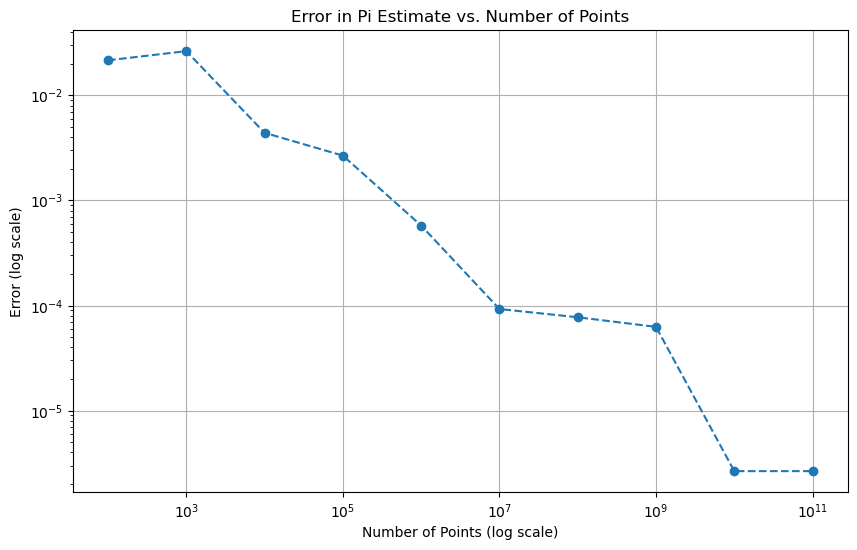

In [39]:
# Log-log plot of the error vs. number of points
plt.figure(figsize=(10, 6))
plt.loglog(points_array, errors_array, marker='o', linestyle='--')
plt.title('Error in Pi Estimate vs. Number of Points')
plt.xlabel('Number of Points (log scale)')
plt.ylabel('Error (log scale)')
plt.grid(True)
plt.show()

In [30]:
# Fitting a line to the log-log plot to find the convergence rate
def linear_fit(x, a, b):
    return a * x + b

Convergence rate: -0.47167105923229524


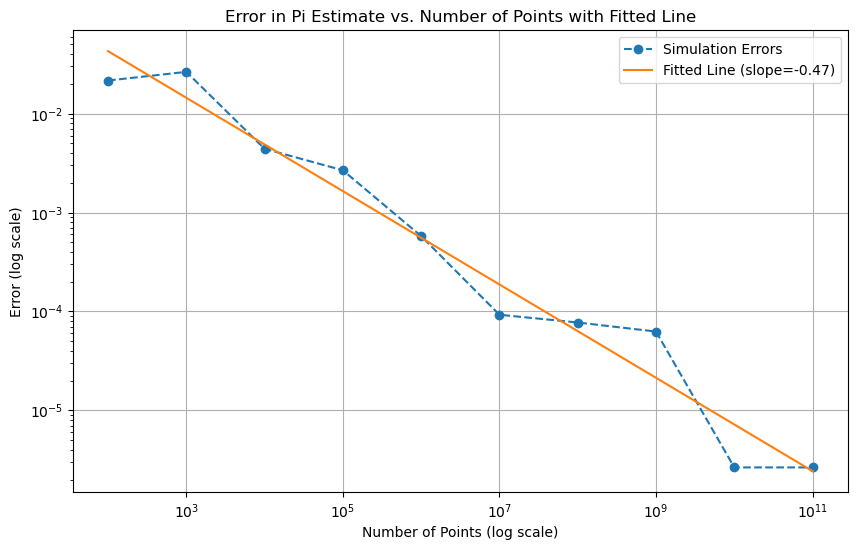

In [40]:
# Log-log plot of the error vs. number of points
plt.figure(figsize=(10, 6))
plt.loglog(points_array, errors_array, marker='o', linestyle='--', label='Simulation Errors')

# Taking the log of both axes
log_points = np.log10(points_array)
log_errors = np.log10(errors_array)

# Fitting a line to the log-log data
params, _ = curve_fit(linear_fit, log_points, log_errors)

# Getting the slope (convergence rate) and intercept
slope, intercept = params
print(f"Convergence rate: {slope}")

# Generating fitted line 
fitted_log_errors = linear_fit(log_points, slope, intercept)
fitted_errors = 10**fitted_log_errors  # Exponentiate to get out of log scale

# Plotting the fitted line
plt.loglog(points_array, fitted_errors, label=f'Fitted Line (slope={slope:.2f})')


plt.title('Error in Pi Estimate vs. Number of Points with Fitted Line')
plt.xlabel('Number of Points (log scale)')
plt.ylabel('Error (log scale)')
plt.grid(True)
plt.legend()

plt.show()

In [32]:
# Comparison with theoretical value
theoretical_slope = -0.5

print(f"Calculated Convergence Rate: {slope}")
print(f"Theoretical Convergence Rate: {theoretical_slope}")

# Compare the results
if np.isclose(slope, theoretical_slope, atol=0.1):
    print("The calculated slope is close to the theoretical expectation.")
else:
    print("The calculated slope deviates from the theoretical expectation.")


Calculated Convergence Rate: -0.47167105923229524
Theoretical Convergence Rate: -0.5
The calculated slope is close to the theoretical expectation.
